In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../Dataset/Processed/gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3552, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 7,0.45,5000.0,3.0,2.0,1,2.0,Old Property,900.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0
1,flat,m3m woodshire,sector 107,1.20,6176.0,3.0,3.0,3,7.0,Relatively New,1750.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
2,flat,godrej icon,sector 88,1.75,14894.0,3.0,3.0,3+,6.0,New Property,1306.0,0.0,0.0,0.0,0.0,0.0,1.0,55.0
3,flat,the lions cghs,sector 56,2.00,8333.0,4.0,4.0,3,8.0,Relatively New,2253.0,0.0,0.0,0.0,0.0,1.0,0.0,49.0
4,flat,puri emerald bay,sector 104,2.65,15006.0,3.0,4.0,3,15.0,Relatively New,2090.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 7,0.45,3.0,2.0,1,2.0,Old Property,900.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0
1,flat,sector 107,1.20,3.0,3.0,3,7.0,Relatively New,1750.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
2,flat,sector 88,1.75,3.0,3.0,3+,6.0,New Property,1306.0,0.0,0.0,0.0,0.0,0.0,1.0,55.0
3,flat,sector 56,2.00,4.0,4.0,3,8.0,Relatively New,2253.0,0.0,0.0,0.0,0.0,1.0,0.0,49.0
4,flat,sector 104,2.65,3.0,4.0,3,15.0,Relatively New,2090.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0


### luxury score

<Axes: ylabel='luxury_score'>

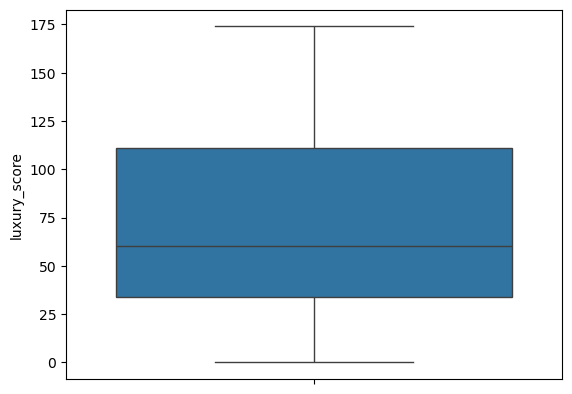

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 7,0.45,3.0,2.0,1,2.0,Old Property,900.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,Low
1,flat,sector 107,1.20,3.0,3.0,3,7.0,Relatively New,1750.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
2,flat,sector 88,1.75,3.0,3.0,3+,6.0,New Property,1306.0,0.0,0.0,0.0,0.0,0.0,1.0,55.0,Medium
3,flat,sector 56,2.00,4.0,4.0,3,8.0,Relatively New,2253.0,0.0,0.0,0.0,0.0,1.0,0.0,49.0,Low
4,flat,sector 104,2.65,3.0,4.0,3,15.0,Relatively New,2090.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0,High


### floorNum

<Axes: ylabel='floorNum'>

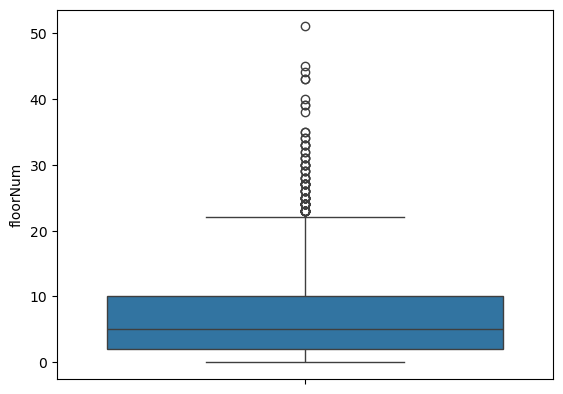

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sector 7,0.45,3.0,2.0,1,2.0,Old Property,900.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,Low,Low Floor
1,flat,sector 107,1.20,3.0,3.0,3,7.0,Relatively New,1750.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,Mid Floor
2,flat,sector 88,1.75,3.0,3.0,3+,6.0,New Property,1306.0,0.0,0.0,0.0,0.0,0.0,1.0,55.0,Medium,Mid Floor
3,flat,sector 56,2.00,4.0,4.0,3,8.0,Relatively New,2253.0,0.0,0.0,0.0,0.0,1.0,0.0,49.0,Low,Mid Floor
4,flat,sector 104,2.65,3.0,4.0,3,15.0,Relatively New,2090.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0,High,High Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sector 7,0.45,3.0,2.0,1,Old Property,900.0,0.0,0.0,0.0,0.0,1.0,1.0,Low,Low Floor
1,flat,sector 107,1.20,3.0,3.0,3,Relatively New,1750.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Mid Floor
2,flat,sector 88,1.75,3.0,3.0,3+,New Property,1306.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Mid Floor
3,flat,sector 56,2.00,4.0,4.0,3,Relatively New,2253.0,0.0,0.0,0.0,0.0,1.0,0.0,Low,Mid Floor
4,flat,sector 104,2.65,3.0,4.0,3,Relatively New,2090.0,0.0,1.0,0.0,0.0,0.0,0.0,High,High Floor


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56', 'sector 57', 'sector 58', 'sector 59', 'sector 6',
       'sector 60', 'sector 61', 'sector 62', 'sector 63', '

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,70.0,3.0,2.0,1.0,2.0,900.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,10.0,3.0,3.0,3.0,3.0,1750.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,88.0,3.0,3.0,4.0,1.0,1306.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3,0.0,56.0,4.0,4.0,3.0,3.0,2253.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
4,0.0,7.0,3.0,4.0,3.0,3.0,2090.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,0.0,82.0,3.0,3.0,4.0,3.0,1650.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
3548,1.0,32.0,1.0,1.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3549,0.0,69.0,4.0,4.0,2.0,3.0,1804.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0
3550,0.0,84.0,3.0,3.0,3.0,3.0,1500.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


In [20]:
y_label

0       0.45
1       1.20
2       1.75
3       2.00
4       2.65
        ... 
3547    2.40
3548    0.85
3549    1.70
3550    1.76
3551    0.94
Name: price, Length: 3552, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

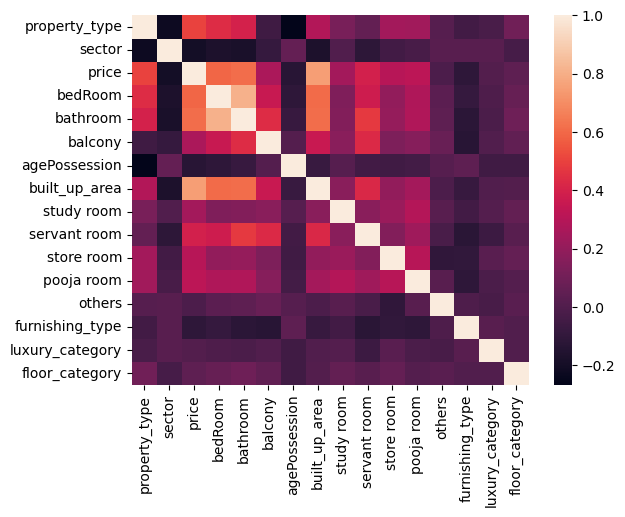

In [21]:
sns.heatmap(data_label_encoded.corr())

In [22]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.202600
1,price,1.000000
2,bedRoom,0.591352
3,bathroom,0.610056
4,balcony,0.269196
5,agePossession,-0.129374
6,built_up_area,0.748132
7,study room,0.243607
8,servant room,0.391484
9,store room,0.304247


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.651267
1,sector,0.100273
0,property_type,0.099834
2,bedRoom,0.027764
3,bathroom,0.024008
8,servant room,0.019338
5,agePossession,0.015346
4,balcony,0.012819
7,study room,0.010902
12,furnishing_type,0.010007


### Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.681638
1,sector,0.102033
0,property_type,0.098086
3,bathroom,0.035860
2,bedRoom,0.034487
8,servant room,0.025124
9,store room,0.008215
7,study room,0.004675
5,agePossession,0.004559
12,furnishing_type,0.002008


### Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=100, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.748683
0,property_type,0.253023
1,sector,0.182925
8,servant room,0.032512
2,bedRoom,0.020441
3,bathroom,0.017657
4,balcony,0.004865
7,study room,0.004274
5,agePossession,0.003166
14,floor_category,0.001752


### Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength)
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.508054
0,property_type,0.710451
3,bathroom,0.290051
9,store room,0.206505
8,servant room,0.180966
7,study room,0.179234
10,pooja room,0.085381
13,luxury_category,0.043503
2,bedRoom,0.020710
5,agePossession,0.000000


### Technique 6 - RFE

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6
 

,feature,rfe_score
6,built_up_area,0.649524
1,sector,0.104466
0,property_type,0.098161
2,bedRoom,0.027571
3,bathroom,0.024818
8,servant room,0.016843
5,agePossession,0.013989
4,balcony,0.012729
7,study room,0.010327
12,furnishing_type,0.009570


### Technique 7 - Linear Regression Weights

In [28]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.510632
0,property_type,0.711414
3,bathroom,0.296528
9,store room,0.210900
8,servant room,0.191291
7,study room,0.187448
10,pooja room,0.088584
13,luxury_category,0.054709
2,bedRoom,0.024258
5,agePossession,0.005867


### Technique 8 - SHAP

In [29]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 4.25898938e-01, -4.48792706e-02, -4.99417717e-02, ...,
        -1.77870063e-02, -1.62415720e-02, -6.74338162e-03],
       [-3.10997060e-01, -2.66469067e-01, -2.67445949e-02, ...,
        -3.36371565e-03, -3.39965291e-03, -3.08249573e-02],
       [-1.88553864e-01, -2.33383533e-01,  1.02764855e-02, ...,
        -7.52706277e-03,  1.45580708e-02, -3.93199545e-04],
       ...,
       [-4.45195792e-01,  2.58354903e-02,  3.02340960e-02, ...,
        -1.57280406e-02,  2.37621850e-02, -1.79568266e-02],
       [-2.19745208e-01, -2.40708898e-01, -1.13154309e-02, ...,
         1.64181522e-02,  3.20328853e-02,  1.25487075e-02],
       [-1.92422888e-01, -3.36711377e-01, -5.97515708e-02, ...,
        -3.33228773e-03, -3.13399147e-03,  1.90417671e-02]])

In [30]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.244048
0,property_type,0.466121
1,sector,0.382353
3,bathroom,0.118717
8,servant room,0.093461
2,bedRoom,0.060585
4,balcony,0.040531
5,agePossession,0.027670
12,furnishing_type,0.026239
14,floor_category,0.023995


In [31]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [32]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.202600,0.100273,0.102033,0.182925,-0.048161,0.104466,-0.056769,0.382353
bedRoom,0.591352,0.027764,0.034487,0.020441,0.020710,0.027571,0.024258,0.060585
bathroom,0.610056,0.024008,0.035860,0.017657,0.290051,0.024818,0.296528,0.118717
balcony,0.269196,0.012819,0.001675,0.004865,-0.035759,0.012729,-0.058625,0.040531
agePossession,-0.129374,0.015346,0.004559,0.003166,0.000000,0.013989,0.005867,0.027670
built_up_area,0.748132,0.651267,0.681638,0.748683,1.508054,0.649524,1.510632,1.244048
study room,0.243607,0.010902,0.004675,0.004274,0.179234,0.010327,0.187448,0.021892
servant room,0.391484,0.019338,0.025124,0.032512,0.180966,0.016843,0.191291,0.093461
store room,0.304247,0.006333,0.008215,-0.001410,0.206505,0.009000,0.210900,0.014232


In [33]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [34]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.706631
sector             0.140750
bathroom           0.033641
bedRoom            0.029762
servant room       0.028963
balcony            0.010883
agePossession      0.010797
study room         0.008688
furnishing_type    0.006898
store room         0.006310
floor_category     0.005404
luxury_category    0.005029
pooja room         0.004149
others             0.002094
dtype: float64

In [35]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,70.0,3.0,2.0,1.0,2.0,900.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,10.0,3.0,3.0,3.0,3.0,1750.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,88.0,3.0,3.0,4.0,1.0,1306.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3,0.0,56.0,4.0,4.0,3.0,3.0,2253.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
4,0.0,7.0,3.0,4.0,3.0,3.0,2090.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,0.0,82.0,3.0,3.0,4.0,3.0,1650.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
3548,1.0,32.0,1.0,1.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3549,0.0,69.0,4.0,4.0,2.0,3.0,1804.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0
3550,0.0,84.0,3.0,3.0,3.0,3.0,1500.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


In [36]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [37]:
scores.mean()

0.7926452795936552

In [38]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [39]:
scores.mean()

0.7901123537253241

In [40]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [41]:
export_df.to_csv('../Dataset/Processed/gurgaon_properties_post_feature_selection.csv', index=False)

In [42]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,1.0,70.0,3.0,2.0,1.0,2.0,900.0,0.0,0.0,1.0,1.0,1.0,0.45
1,0.0,10.0,3.0,3.0,3.0,3.0,1750.0,0.0,0.0,0.0,1.0,2.0,1.20
2,0.0,88.0,3.0,3.0,4.0,1.0,1306.0,0.0,0.0,1.0,2.0,2.0,1.75
3,0.0,56.0,4.0,4.0,3.0,3.0,2253.0,0.0,0.0,0.0,1.0,2.0,2.00
4,0.0,7.0,3.0,4.0,3.0,3.0,2090.0,1.0,0.0,0.0,0.0,0.0,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,0.0,82.0,3.0,3.0,4.0,3.0,1650.0,1.0,0.0,2.0,1.0,0.0,2.40
3548,1.0,32.0,1.0,1.0,0.0,0.0,1000.0,0.0,0.0,1.0,1.0,1.0,0.85
3549,0.0,69.0,4.0,4.0,2.0,3.0,1804.0,1.0,1.0,1.0,0.0,2.0,1.70
3550,0.0,84.0,3.0,3.0,3.0,3.0,1500.0,1.0,0.0,0.0,0.0,2.0,1.76
